# Simple Python example: shear frame

In [1]:
import koma.oma

import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import detrend

import pandas as pd

## Load data and define input


In [2]:
# Import and specify properties of input data
df = pd.read_csv('response_data.csv', sep=',',header=None)
data = df.values      # data including noise
levels = 3
fs = 3.0
t = np.arange(0,1/fs*(data.shape[0]),1/fs)

# Cov-SSI settings
i = 20
s = 4
orders = np.arange(2, 50+2, 2)
stabcrit = {'freq':0.2, 'damping': 0.2, 'mac': 0.3}

# Noise specification
noise_factor = 0.0

## Add artificial noise and plot response

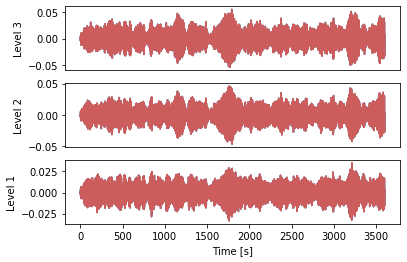

In [3]:
noise = np.std(data) * noise_factor
data_noised = data + noise*np.random.randn(data.shape[0], data.shape[1])

fig, ax = plt.subplots(nrows=3, ncols=1, num=1)
ax[0].plot(t, data_noised[:,0])
ax[0].plot(t, data[:,0], color='IndianRed', alpha=1)
ax[1].plot(t, data_noised[:,3])
ax[1].plot(t, data[:,3], color='IndianRed', alpha=1)
ax[2].plot(t, data_noised[:,6])
ax[2].plot(t, data[:,6], color='IndianRed', alpha=1)

__ = [a.set_xticks([]) for a in ax[0:2]]
__ = ax[2].set_xlabel('Time [s]')

__ = ax[0].set_ylabel('Level 3')
__ = ax[1].set_ylabel('Level 2')
__ = ax[2].set_ylabel('Level 1')

## Cov-SSI call

In [4]:
lambd, phi = koma.oma.covssi(data, fs, i, orders)

*** Covariance-driven SSI algorithm for OMA ***
> Establishing Hankel/Toeplitz matrices
  >> Correlation estimation
  >> Matrix stacking
> Establishing weighting matrices
  >> Weighting requested: NONE
> Computing SVD
> Computing state matrix for each order to establish modes
> Computation completed


## Postprocessing and visualization

In [5]:
# Establishing stable poles
lambd_stab, phi_stab, orders_stab, ix_stab = koma.oma.find_stable_poles(lambd, phi, orders, s, stabcrit=stabcrit, indicator='mac')
omega_d = np.abs(np.imag(lambd_stab))


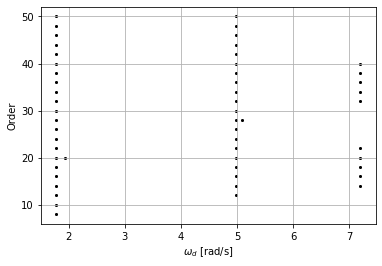

In [6]:
#%% Plot stabplot
fig = plt.figure()
plt.grid(True)
plt.scatter(omega_d, orders_stab,  s=12, alpha=1, color='black', marker='.')

_ = plt.ylabel('Order')
_ = plt.xlabel(r'$\omega_d$ [rad/s]')